In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("F:\\He_is_enough03 X UniqoXTech X Dreams\\Machine Learning\\Bank Customer Churn Predictor\\archive\\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.drop(['RowNumber'], axis=1, inplace= True)

In [4]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
data= data.join(pd.get_dummies(data['Geography'], prefix= 'Geo').astype('int'))
data.drop(['Geography'],axis=1,inplace = True)
data.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [9]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
data['Gender']= data['Gender'].astype('str').apply(lambda x: 1 if x=='Female' else 0)
data.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,15634602,Hargrave,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,Hill,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,Onio,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,Boni,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,Mitchell,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [11]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geo_France', 'Geo_Germany', 'Geo_Spain'],
      dtype='object')

In [13]:
data= data[['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geo_France', 'Geo_Germany', 'Geo_Spain', 'Exited']]
data.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Exited
0,15634602,Hargrave,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,15647311,Hill,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,Onio,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,15701354,Boni,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,15737888,Mitchell,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Gender           10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Geo_France       10000 non-null  int32  
 12  Geo_Germany      10000 non-null  int32  
 13  Geo_Spain        10000 non-null  int32  
 14  Exited           10000 non-null  int64  
dtypes: float64(2), int32(3), int64(9), object(1)
memory usage: 1.0+ MB


In [17]:
data.duplicated().sum()

0

In [19]:
data[['CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geo_France', 'Geo_Germany', 'Geo_Spain', 'Exited']].corr().style.background_gradient(cmap='coolwarm')

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Exited
CreditScore,1.000000,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.008928,0.005538,0.004780,-0.027094
Gender,0.002857,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,-0.006772,0.024628,-0.016889,0.106512
Age,-0.003965,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,-0.039208,0.046897,-0.001685,0.285323
Tenure,0.000842,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.002848,-0.000567,0.003868,-0.014001
Balance,0.006268,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,-0.231329,0.401110,-0.134892,0.118533
NumOfProducts,0.012238,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,0.001230,-0.010419,0.009039,-0.047820
HasCrCard,-0.005458,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.002467,0.010577,-0.013480,-0.007138
IsActiveMember,0.025651,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,0.003317,-0.020486,0.016732,-0.156128
EstimatedSalary,-0.001384,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,-0.003332,0.010297,-0.006482,0.012097
Geo_France,-0.008928,-0.006772,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,1.000000,-0.580359,-0.575418,-0.104955


In [20]:
X= data[['CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geo_France', 'Geo_Germany', 'Geo_Spain']]
y= data['Exited']

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
sc= StandardScaler()
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)
X_train_scld= sc.fit_transform(X_train)
X_test_scld= sc.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train_scld, y_train)
y_pred_lr= lr.predict(X_test_scld)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
acc_lr= accuracy_score(y_test, y_pred_lr)
acc_lr

0.8075

In [26]:
from sklearn.metrics import confusion_matrix
cm= pd.DataFrame(confusion_matrix(y_test, y_pred_lr))
cm

,0,1
0,1542,62
1,323,73


In [28]:
knn= KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train_scld, y_train)
y_pred_knn= knn.predict(X_test_scld)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
acc_knn= accuracy_score(y_test, y_pred_knn)
acc_knn

0.827

In [30]:
cm_knn= confusion_matrix(y_test, y_pred_knn)
cm_knn= pd.DataFrame(cm_knn)
cm_knn

,0,1
0,1500,104
1,242,154


In [32]:
svc= SVC(kernel= 'rbf', probability=True)
svc.fit(X_train_scld, y_train)
y_pred_svc= svc.predict(X_test_scld)
y_pred_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
acc_svc= accuracy_score(y_test, y_pred_svc)
acc_svc

0.8625

In [34]:
cm_svc= confusion_matrix(y_test, y_pred_svc)
cm_svc= pd.DataFrame(cm_svc)
cm_svc

,0,1
0,1567,37
1,238,158


In [37]:
rfc= RandomForestClassifier(n_estimators=100, criterion='gini')
rfc.fit(X_train_scld, y_train)
y_pred_rfc= rfc.predict(X_test_scld)
y_pred_rfc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
acc_rfc= accuracy_score(y_test, y_pred_rfc)
acc_rfc

0.8675

In [39]:
cm_rfc= confusion_matrix(y_test, y_pred_rfc)
cm_rfc= pd.DataFrame(cm_rfc)
cm_rfc

,0,1
0,1548,56
1,209,187


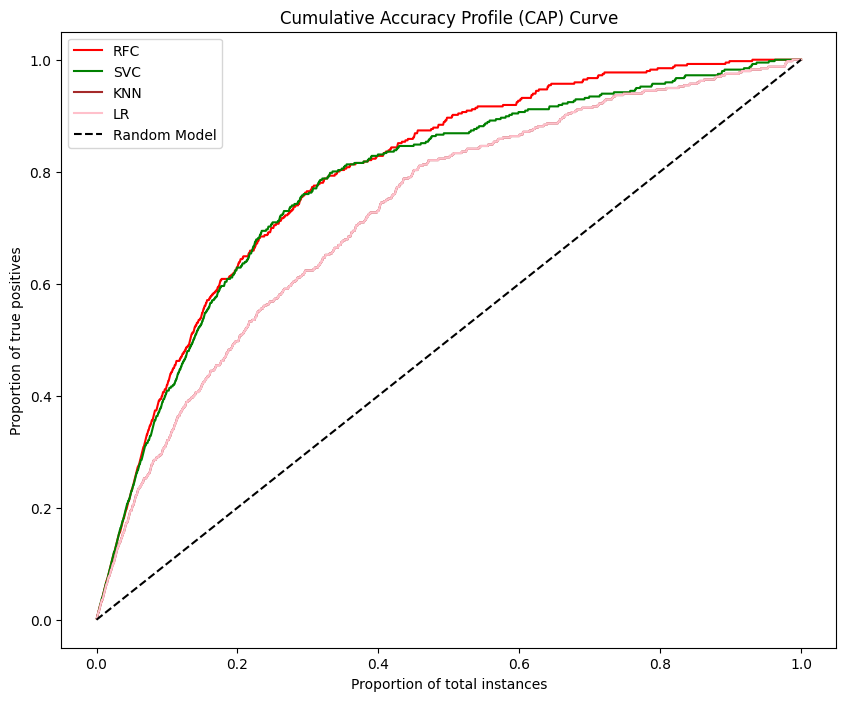

In [41]:
#RFC
y_probs_rfc = rfc.predict_proba(X_test_scld)[:, 1]  
sorted_indices_rfc = np.argsort(y_probs_rfc)[::-1]
y_true_sorted_rfc = y_test.values[sorted_indices_rfc] 
cumulative_true_positives_rfc = np.cumsum(y_true_sorted_rfc)
total_positives_rfc = np.sum(y_true_sorted_rfc)
x_rfc = np.arange(1, len(y_true_sorted_rfc) + 1) / len(y_true_sorted_rfc)
y_rfc = cumulative_true_positives_rfc / total_positives_rfc

#SVC
y_probs_svc = svc.predict_proba(X_test_scld)[:, 1]  
sorted_indices_svc = np.argsort(y_probs_svc)[::-1]
y_true_sorted_svc = y_test.values[sorted_indices_svc] 
cumulative_true_positives_svc = np.cumsum(y_true_sorted_svc)
total_positives_svc = np.sum(y_true_sorted_svc)
x_svc = np.arange(1, len(y_true_sorted_svc) + 1) / len(y_true_sorted_svc)
y_svc = cumulative_true_positives_svc / total_positives_svc

#KNN
y_probs_knn = knn.predict_proba(X_test_scld)[:, 1]  
sorted_indices_knn = np.argsort(y_probs_knn)[::-1]
y_true_sorted_knn = y_test.values[sorted_indices_knn] 
cumulative_true_positives_knn = np.cumsum(y_true_sorted_knn)
total_positives_knn = np.sum(y_true_sorted_knn)
x_knn = np.arange(1, len(y_true_sorted_knn) + 1) / len(y_true_sorted_knn)
y_knn = cumulative_true_positives_knn / total_positives_knn

#LOGISTIC REG
y_probs_lr = lr.predict_proba(X_test_scld)[:, 1]  
sorted_indices_lr = np.argsort(y_probs_lr)[::-1]
y_true_sorted_lr = y_test.values[sorted_indices_lr] 
cumulative_true_positives_lr = np.cumsum(y_true_sorted_lr)
total_positives_lr = np.sum(y_true_sorted_lr)
x_lr = np.arange(1, len(y_true_sorted_lr) + 1) / len(y_true_sorted_lr)
y_lr = cumulative_true_positives_lr / total_positives_lr

plt.figure(figsize=(10, 8))
plt.plot(x_rfc, y_rfc, label='RFC', color='red')
plt.plot(x_svc, y_svc, label='SVC', color='green')
plt.plot(x_knn, y_knn, label='KNN', color='brown')
plt.plot(x_lr, y_knn, label='LR', color='pink')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Model', color='black')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.xlabel('Proportion of total instances')
plt.ylabel('Proportion of true positives')
plt.legend()
plt.show()

In [43]:
joblib.dump(rfc, 'rfc_model.pkl')

['rfc_model.pkl']